### Código + **Relatório**

**Aluno:** Savio Augusto Machado Araujo

Este notebook Python contém o código implementado juntamente do relatório, seguindo o padrão que cada célula de Markdown (como essa) refere-se diretamente à célula de código Python seguinte e seus resultados pós-execução, quando aplicável.

Para a execução deste trabalho, foram utilizadas redes GNG. A escolha de redes GNG se provou um obstáculo inicial considerável, visto que bibliotecas que possuem tal implementação estão sem suporte há anos e possuem diversos erros sob as versões mais atuais do Python, impossibilitando o uso sem correções profundas. Desta forma, foram pesquisadas outras implementações mais recentes e/ou mais "modestas", sendo assim a implementação de GNG usada neste trabalho está disponível no GitHub [neste link](https://github.com/rendchevi/growing-neural-gas/blob/master/neuralgas.py); como essa implementação é apenas um reposítório e não um pacote disponível via `pip`, o código em questão foi entregue nesta mesma pasta (arquivo `neuralgas.py`), sem alterações no código original do autor, apenas para poupar a necessidade de download externo. 

Ademais, as bibliotecas Numpy e Matplotlib foram usadas para avaliação dos resultados da rede, retornada como uma estrutura `Graph` da biblioteca igraph; foi usado PCA da biblioteca sklearn para redução de dimensionalidade a fim de gerar resultados visualmente compreensíveis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from neuralgas import GrowingNeuralGas
from igraph import Graph
from sklearn.decomposition import PCA

### Teste GNG & Estrutura

A célula a seguir e seus resultados são apenas um teste para demonstrar o funcionamento básico e resultado da rede GNG usando a implementação do repositório citado anteriormente, atuando sob dados *dummy* de círculos gerados aleatoriamente. Os parâmetros usados são os valores *default* vistos em aula, quando aplicável; com mais detalhes sobre os parâmetros:
- `max_neurons`: número máximo de neurônios na rede.
- `max_iter`: número máximo de iterações; cada iteração consiste em `l` passos de aprendizado, e a cada iteração um novo neurônio é adicionado.
- `max_age`: idade máxima que as conexões podem alcançar antes de serem desfeitas.
- `eb`: taxa de aprendizado do neurônio vencedor.
- `en`: taxa de aprendizado dos vizinhos do neurônio vencedor.
- `alpha`: fator de ajuste do erro local.
- `beta`: fator de ajuste do erro global.
- `l`: quantidade de passos de aprendizado em cada iteração; a cada `l` passos (1 iteração) um novo neurônio é adicionado.

Como citado anteriormente, a saída do aprendizado é do tipo `Graph`. 

##### **Na imagem plotada, os pontos em cinza consistem nos dados reais, enquanto a estrutura de arestas em vermelho representa o grafo gerado pela rede GNG. Assim, os neurônios de fato não foram plotados, apenas as arestas, a fim de nao obstruir os dados reais.** 

Esse mesmo padrão será usado ao longo deste relatório, a fim de comparar o ajuste da rede aos dados reais.

100%|█████████▉| 999/1000 [00:47<00:00, 21.22it/s]


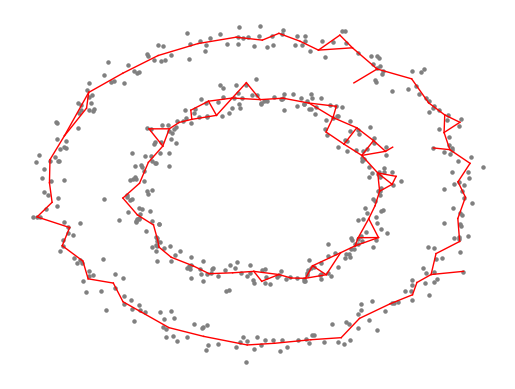

In [6]:
X, _ = make_circles(n_samples=500, noise=0.05, factor=0.6)


model = GrowingNeuralGas(
    max_neurons=100,
    max_iter=1000,
    max_age=90,
    eb=10e-2,
    en=10e-4,
    alpha=0.5,
    beta=0.005,
    l=50,
    dataset=X
)
graph:Graph = model.learn()


plt.scatter(X[:, 0], X[:, 1], c='gray', s=5)
for edge in graph.es:
    v1 = graph.vs[edge.source]
    v2 = graph.vs[edge.target]
    plt.plot([v1['weight'][0], v2['weight'][0]], [v1['weight'][1], v2['weight'][1]], c='r', linewidth=1.0)
plt.axis('off')
plt.show()

### Dataset 1 - **Student Performance Factors**

O primeiro dataset usado consiste numa série de parâmetros de perfomance estudantil, disponível no Kaggle [neste link](https://www.kaggle.com/code/ahmedezzatibrahem/student-performance-factors). Como a tarefa em foco com a rede GNG não consiste na inferência da nota de exame final (proposta original do dataset) mas sim na avaliação visual da adaptação da rede aos dados, foram extraídos 5 campos do total do dataset, respectivamente `Hours_Studied`, `Sleep_Hours`, `Tutoring_Sessions`, `Physical_Activity` e `Exam_Score`, a fim de evitar a necessidade de converter dados textuais em classes numéricas e/ou discretizar outros. Além disso, a combinação desses campos sob PCA apresentou uma distribuição menos genérica e portanto mais interessante para avaliação; tal distribuição poderá ser vista mais à frente juntamente dos resultados dos modelos treinados. Foi aplicado PCA com alvo em 2 componentes, justamente para possibilitar a visualização bidimensional.

In [2]:
X = np.genfromtxt('StudentPerformanceFactors.csv', delimiter=',', skip_header=1)
X = X[:, [0, 5, 9, 14, 19]]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Foram treinados 18 modelos combinando os hiperparâmetros possíveis escolhidos, sendo esses os seguintes:
|n_max|
|-----|
|60|
|120|

|a_max|
|-----|
|30|
|90|
|150|

|eb|en|
|--|--|
|0.3|0.005|
|0.1|0.001|
|0.03|0.0005|

A escolha das quantidades máximas de neurônios tem como base o número de *samples* do dataset (~6600), visando a tentativa de "representar" a distribuição dos dados com, respectivamente, ~1% (60) e ~2% (120) do total de *samples* como quantia de neurônios.

Vale notar que `eb` e `en` foram combinados com os demais hiperparâmetros como um só par, portanto 2\*3\*3=18 possiblidades no total. Além disso, os demais parâmetros foram fixados, sendo eles 500 iterações, 100 passos de aprendizagem por iteração, `alpha` de 0.5 e `beta` de 0.005 (valores *default*). Sendo assim, no total são executados 50.000 passos de aprendizagem e a cada 100 passos um novo neurônio é introduzido (até o limite dado).


In [49]:
l_max_neurons = [60, 120]
l_max_ages = [30, 90, 150]
l_eb = [0.3, 0.1, 0.03]
l_en = [0.005, 0.001, 0.0005]

graphs = []
for max_neurons in l_max_neurons:
    for max_age in l_max_ages:
        for eb, en in zip(l_eb, l_en):
            print(f"Graph {len(graphs) + 1} | max_neurons={max_neurons}, max_age={max_age}, eb={eb}, en={en}") 
            model = GrowingNeuralGas(
                max_neurons=max_neurons,
                max_iter=500,
                max_age=max_age,
                eb=eb,
                en=en,
                alpha=0.5,
                beta=0.005,
                l=100,
                dataset=X_pca
            )
            graph:Graph = model.learn()
            graphs.append(graph)

Graph 1 | max_age=30, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:32<00:00, 15.20it/s]


Graph 2 | max_age=30, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:32<00:00, 15.57it/s]


Graph 3 | max_age=30, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:31<00:00, 15.85it/s]


Graph 4 | max_age=90, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:34<00:00, 14.46it/s]


Graph 5 | max_age=90, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:33<00:00, 15.02it/s]


Graph 6 | max_age=90, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:31<00:00, 15.63it/s]


Graph 7 | max_age=150, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:36<00:00, 13.83it/s]


Graph 8 | max_age=150, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:34<00:00, 14.57it/s]


Graph 9 | max_age=150, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:34<00:00, 14.34it/s]


Graph 10 | max_age=30, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:58<00:00,  8.50it/s]


Graph 11 | max_age=30, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:58<00:00,  8.48it/s]


Graph 12 | max_age=30, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:56<00:00,  8.76it/s]


Graph 13 | max_age=90, eb=0.3, en=0.005


100%|█████████▉| 499/500 [01:04<00:00,  7.79it/s]


Graph 14 | max_age=90, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:58<00:00,  8.49it/s]


Graph 15 | max_age=90, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:56<00:00,  8.80it/s]


Graph 16 | max_age=150, eb=0.3, en=0.005


100%|█████████▉| 499/500 [01:07<00:00,  7.39it/s]


Graph 17 | max_age=150, eb=0.1, en=0.001


100%|█████████▉| 499/500 [01:00<00:00,  8.19it/s]


Graph 18 | max_age=150, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:59<00:00,  8.44it/s]


A seguir são plotados os resultados finais de todos os 18 modelos treinados. Os grafos em vermelho representam os modelos com `max_neurons` de 60, equanto os em azul têm esse valor como 120. Além disso, cada linha representa um mesmo valor de `max age`, e cada coluna um mesmo valor para o par `eb` e `en`. Em geral não houveram *clusters* absolutamente separados, porém a área inferior (mais densa) e a superior (mais esparsa) apresentaram diferentes comportamentos a serem avaliados.

---

Primeiramente quanto ao número de neurônios (`max_neurons`), vê-se que ambos os valores conseguem representar relativamente bem a área inferior onde mais se concentram os *samples*, tendo alguma dificuldade com a área superior e seus outliers esporádicos. Para o modelo com 120 neurônios é possível observar até mesmo um superajuste no centro da área concentrada, onde o grafo gerado acaba interpolando diretamente os *samples* que estavam próximos. Além disso, para ambos os casos vê-se que os *samples* outliers são comumente não alcançados, possuindo pouca ou nenhuma representação no grafo final. Ainda, priincipalmente para a área superior com uma maior dispersão de outliers, o fator determinante não foi a quantidade de neurônios de 60 ou 120, visto que os resultados foram relativamente similares na quantia de neurônios delegados para a área para cada par equivalente de modelos. 

---

A seguir pode-se avaliar a idade máxima das conexões (`max_age`), fator esse que implicou a princípio na densidade visual dos resultados; porém, uma maior densidade na área inferior nestes casos não resulta em uma boa utilidade marginal. Já para a área superior que é mais esparsa, a idade das arestas vem como um fator que ajuda a delegar mais neurônios para representar essa área, visto que uma idade maior dá mais "tempo" para que se crie uma estrutura sustentável na região esparsa e portanto, crie-se uma melhor representação dessa porção dos dados.

---

Por fim, é possível ver a influência das taxas de aprendizado do neurônio vencedor (`eb`) e seus vizinhos (`en`). Na região inferior percebe-se uma pequena variação na diferença da distância do grafo final quanto aos dados reais; como se espera, para taxas menores treinadas com a mesma quantia de passos de aprendizagem, os neurônios foram menos "puxados" para representar os *samples* das bordas e tendem a se aglomerar um pouco mais. A maior diferença é vista na região superior, onde a taxa de aprendizado trabalha juntamente da idade máxima para criar representações mais sustentáveis da região esparsa: maiores taxas "puxam" mais os neurônios para os outliers, enquanto a idade máxima maior compra tempo para que esse comportamento se solidifique.

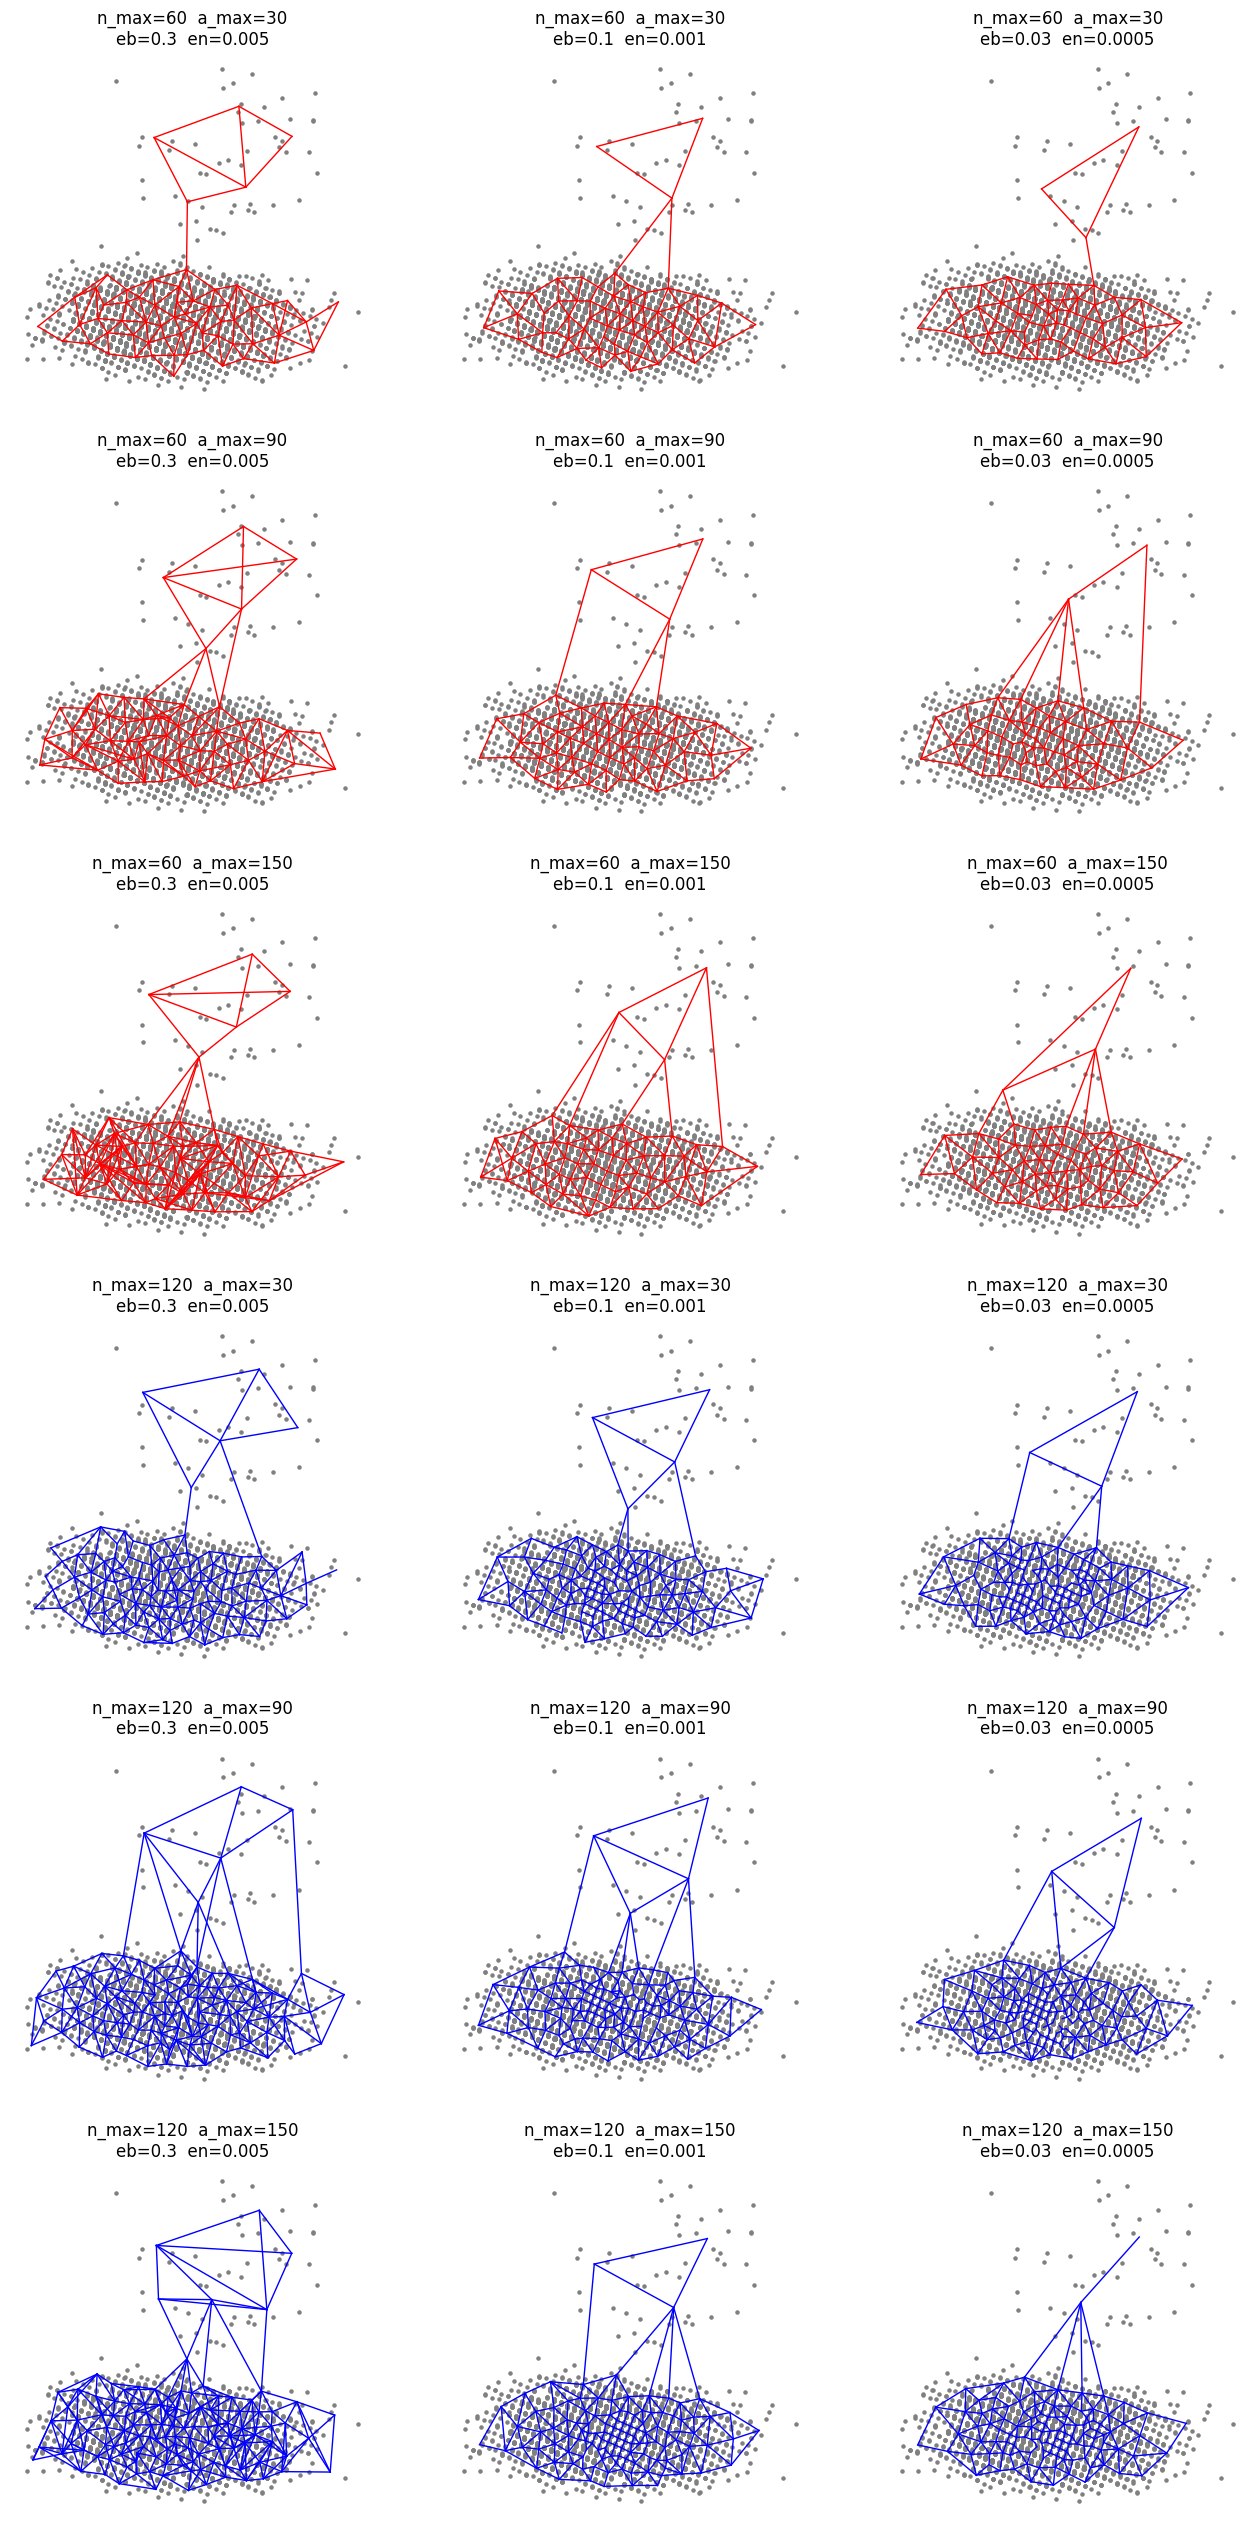

In [50]:
plt.figure(figsize=(16, 32))
for i, graph in zip(range(1, len(graphs) + 1), graphs):
    plt.subplot(6, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', s=5)
    for edge in graph.es:
        v1 = graph.vs[edge.source]
        v2 = graph.vs[edge.target]
        color = 'r' if i <= len(graphs)/2 else 'b'
        plt.plot([v1['weight'][0], v2['weight'][0]], [v1['weight'][1], v2['weight'][1]], c=color, linewidth=1.0)
    plt.axis('off')

i = 1  
for max_neurons in l_max_neurons:
    for max_age in l_max_ages:
        for eb, en in zip(l_eb, l_en):
            plt.subplot(6, 3, i)
            plt.title(f"n_max={max_neurons}  a_max={max_age}\neb={eb}  en={en}")
            i += 1

plt.show()

### Dataset 2 - **Mobile Usage Behaviour**

O segundo dataset usado consiste em dados relacionados ao uso de aparelhos móveis, disponível no Kaggle [neste link](). Novamente, cmo a tarefa em foco com a rede GNG não consiste na inferência da classe do usuário que é a proposta original do dataset, foram extraídos para uso apenas os campos numéricos e relevantes (excluindo IDs), respectivamente `App Usage Time (min/day)`, `Screen On Time (hours/day)`, `Battery Drain (mAh/day)`, `Number of Apps Installed`, `Data Usage (MB/day)` e `Age`. Foi verificado que as diversas combinações dois a dois dos diferentes campos apresentaram caracteristicas gráficas similares, sempre separando bem as 5 classes existentes em diferentes áreas; esse comportamento ainda pode ser visualizado após a PCA, apenas sob uma projeção diferente (mostrado junto dos resultados dos modelos mais a frente). Foi aplicado PCA com alvo em 2 componentes, para a visualização bidimensional.

In [51]:
X = np.genfromtxt('user_behavior_dataset.csv', delimiter=',', skip_header=1)
X = X[:, 3:8]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Novamente foram treinados 18 modelos combinando os hiperparâmetros possíveis escolhidos, sendo esses os seguintes:
|n_max|
|-----|
|35|
|70|

|a_max|
|-----|
|30|
|90|
|150|

|eb|en|
|--|--|
|0.3|0.005|
|0.1|0.001|
|0.03|0.0005|

A escolha das quantidades máximas de neurônios tem como base o número de *samples* do dataset (700), visando a tentativa de "representar" a distribuição dos dados com, respectivamente, 5% (35) e 10% (70) do total de *samples* como quantia de neurônios.

Novamente, `eb` e `en` foram combinados com os demais hiperparâmetros como um só par. Além disso, os demais parâmetros foram fixados, sendo eles 500 iterações, 100 passos de aprendizagem por iteração, `alpha` de 0.5 e `beta` de 0.005 (mesmos valores *default*).


In [53]:
l_max_neurons = [35, 70]
l_max_ages = [30, 90, 150]
l_eb = [0.3, 0.1, 0.03]
l_en = [0.005, 0.001, 0.0005]

graphs = []
for max_neurons in l_max_neurons:
    for max_age in l_max_ages:
        for eb, en in zip(l_eb, l_en):
            print(f"Graph {len(graphs) + 1} | max_neurons={max_neurons}, max_age={max_age}, eb={eb}, en={en}") 
            model = GrowingNeuralGas(
                max_neurons=max_neurons,
                max_iter=500,
                max_age=max_age,
                eb=eb,
                en=en,
                alpha=0.5,
                beta=0.005,
                l=100,
                dataset=X_pca
            )
            graph:Graph = model.learn()
            graphs.append(graph)

Graph 1 | max_neurons=35, max_age=30, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:19<00:00, 25.35it/s]


Graph 2 | max_neurons=35, max_age=30, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:19<00:00, 25.48it/s]


Graph 3 | max_neurons=35, max_age=30, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:19<00:00, 25.78it/s]


Graph 4 | max_neurons=35, max_age=90, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:19<00:00, 25.00it/s]


Graph 5 | max_neurons=35, max_age=90, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:19<00:00, 25.19it/s]


Graph 6 | max_neurons=35, max_age=90, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:20<00:00, 24.90it/s]


Graph 7 | max_neurons=35, max_age=150, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:20<00:00, 24.37it/s]


Graph 8 | max_neurons=35, max_age=150, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:19<00:00, 25.11it/s]


Graph 9 | max_neurons=35, max_age=150, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:19<00:00, 25.04it/s]


Graph 10 | max_neurons=70, max_age=30, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:34<00:00, 14.49it/s]


Graph 11 | max_neurons=70, max_age=30, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:33<00:00, 14.75it/s]


Graph 12 | max_neurons=70, max_age=30, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:34<00:00, 14.56it/s]


Graph 13 | max_neurons=70, max_age=90, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:35<00:00, 14.04it/s]


Graph 14 | max_neurons=70, max_age=90, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:34<00:00, 14.60it/s]


Graph 15 | max_neurons=70, max_age=90, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:33<00:00, 14.68it/s]


Graph 16 | max_neurons=70, max_age=150, eb=0.3, en=0.005


100%|█████████▉| 499/500 [00:35<00:00, 14.02it/s]


Graph 17 | max_neurons=70, max_age=150, eb=0.1, en=0.001


100%|█████████▉| 499/500 [00:34<00:00, 14.36it/s]


Graph 18 | max_neurons=70, max_age=150, eb=0.03, en=0.0005


100%|█████████▉| 499/500 [00:34<00:00, 14.43it/s]


A seguir são plotados os resultados finais de todos os 18 modelos treinados. Os grafos em vermelho representam os modelos com `max_neurons` de 35, equanto os em azul têm esse valor como 70. Além disso, cada linha representa um mesmo valor de `max age`, e cada coluna um mesmo valor para o par `eb` e `en`. Apesar de quase todos os casos não terem resultado em *clusters* absolutamente separados, tem-se um consenso geral no agrupamento em 5 grandes grupos fracamente conectados entre si, ligados por 1 ou duas arestas no máximo; dada a proximidade dos *samples* das "pontas" sem muita perda de densidade, dificilmente essas conexões singulares irão desaparecer, seja por renovação ou eventual reaparição. Esses 5 grupos representam as 5 classes de usuários do dataset, portanto esse comportamento era esperado.

---

Assim, quanto ao número de neurônios (`max_neurons`), além de obviamente influenciar a densidade dos agrupamentos é possível observar que uma maior quantidade de neurônios teve, no mesmo período de treino, maior dificuldade para encontrar as estruturas originais que se aproximam de planos retangulares (ou losangos considerando a projeção do PCA), se adaptando mais à densidade de cada subregião dentro dos grupos. Portanto, com 35 neurônios se obteve uma melhor representação geral dos dados com aproximação da área original, enquanto com 70 neurônios pode-se obter uma melhor ideia da densidade dos dados dentro dessas regiões.

---

Em seguida, ao avaliar a idade máxima das conexões (`max_age`) não é possível ver grandes diferenças a não ser uma maior densidade de arestas nos agrupamentos menores (mais à esquerda). Como citado anteriormente,

> [...] dada a proximidade dos *samples* das "pontas" sem muita perda de densidade, [...]

é compreensível que a variação na idade máxima, mesmo no menor valor usado, não seja capaz de "romper" essas conexões na maioria dos casos e separarar absolutamente os *clusters*; isso ocorre apenas em dois dos modelos de 70 neurônios, e apenas com o grupo mais à esquerda.

---

Enfim pode-se avaliar as taxas de aprendizado do neurônio vencedor (`eb`) e seus vizinhos (`en`). É possível perceber que maiores taxas tendem à gerar uma distribuição mais igualitária da quantidade de neurônios através dos grupos, gerando uma representação mais dispersa e consistente; vê-se uma quantidade similar de conexões distribuídas em cada um dos 5 grupos, pois os neurônios são mais "puxados" (considerando densidades similares nos grupos). Esse comportamento reflete melhor a densidade dos dados mantendo a ideia de forma, portanto se esse é o interesse isso pode ser desejado. Contudo, em um caso que se visa apenas aprender as formas gerais e reduzir a complexidade (como numa redução de polígonos de um objeto 3D, por exemplo) é mais interessante que se tenham menos neurônios delegados a regiões menores e/ou menos complexas, de forma a simplificá-las.

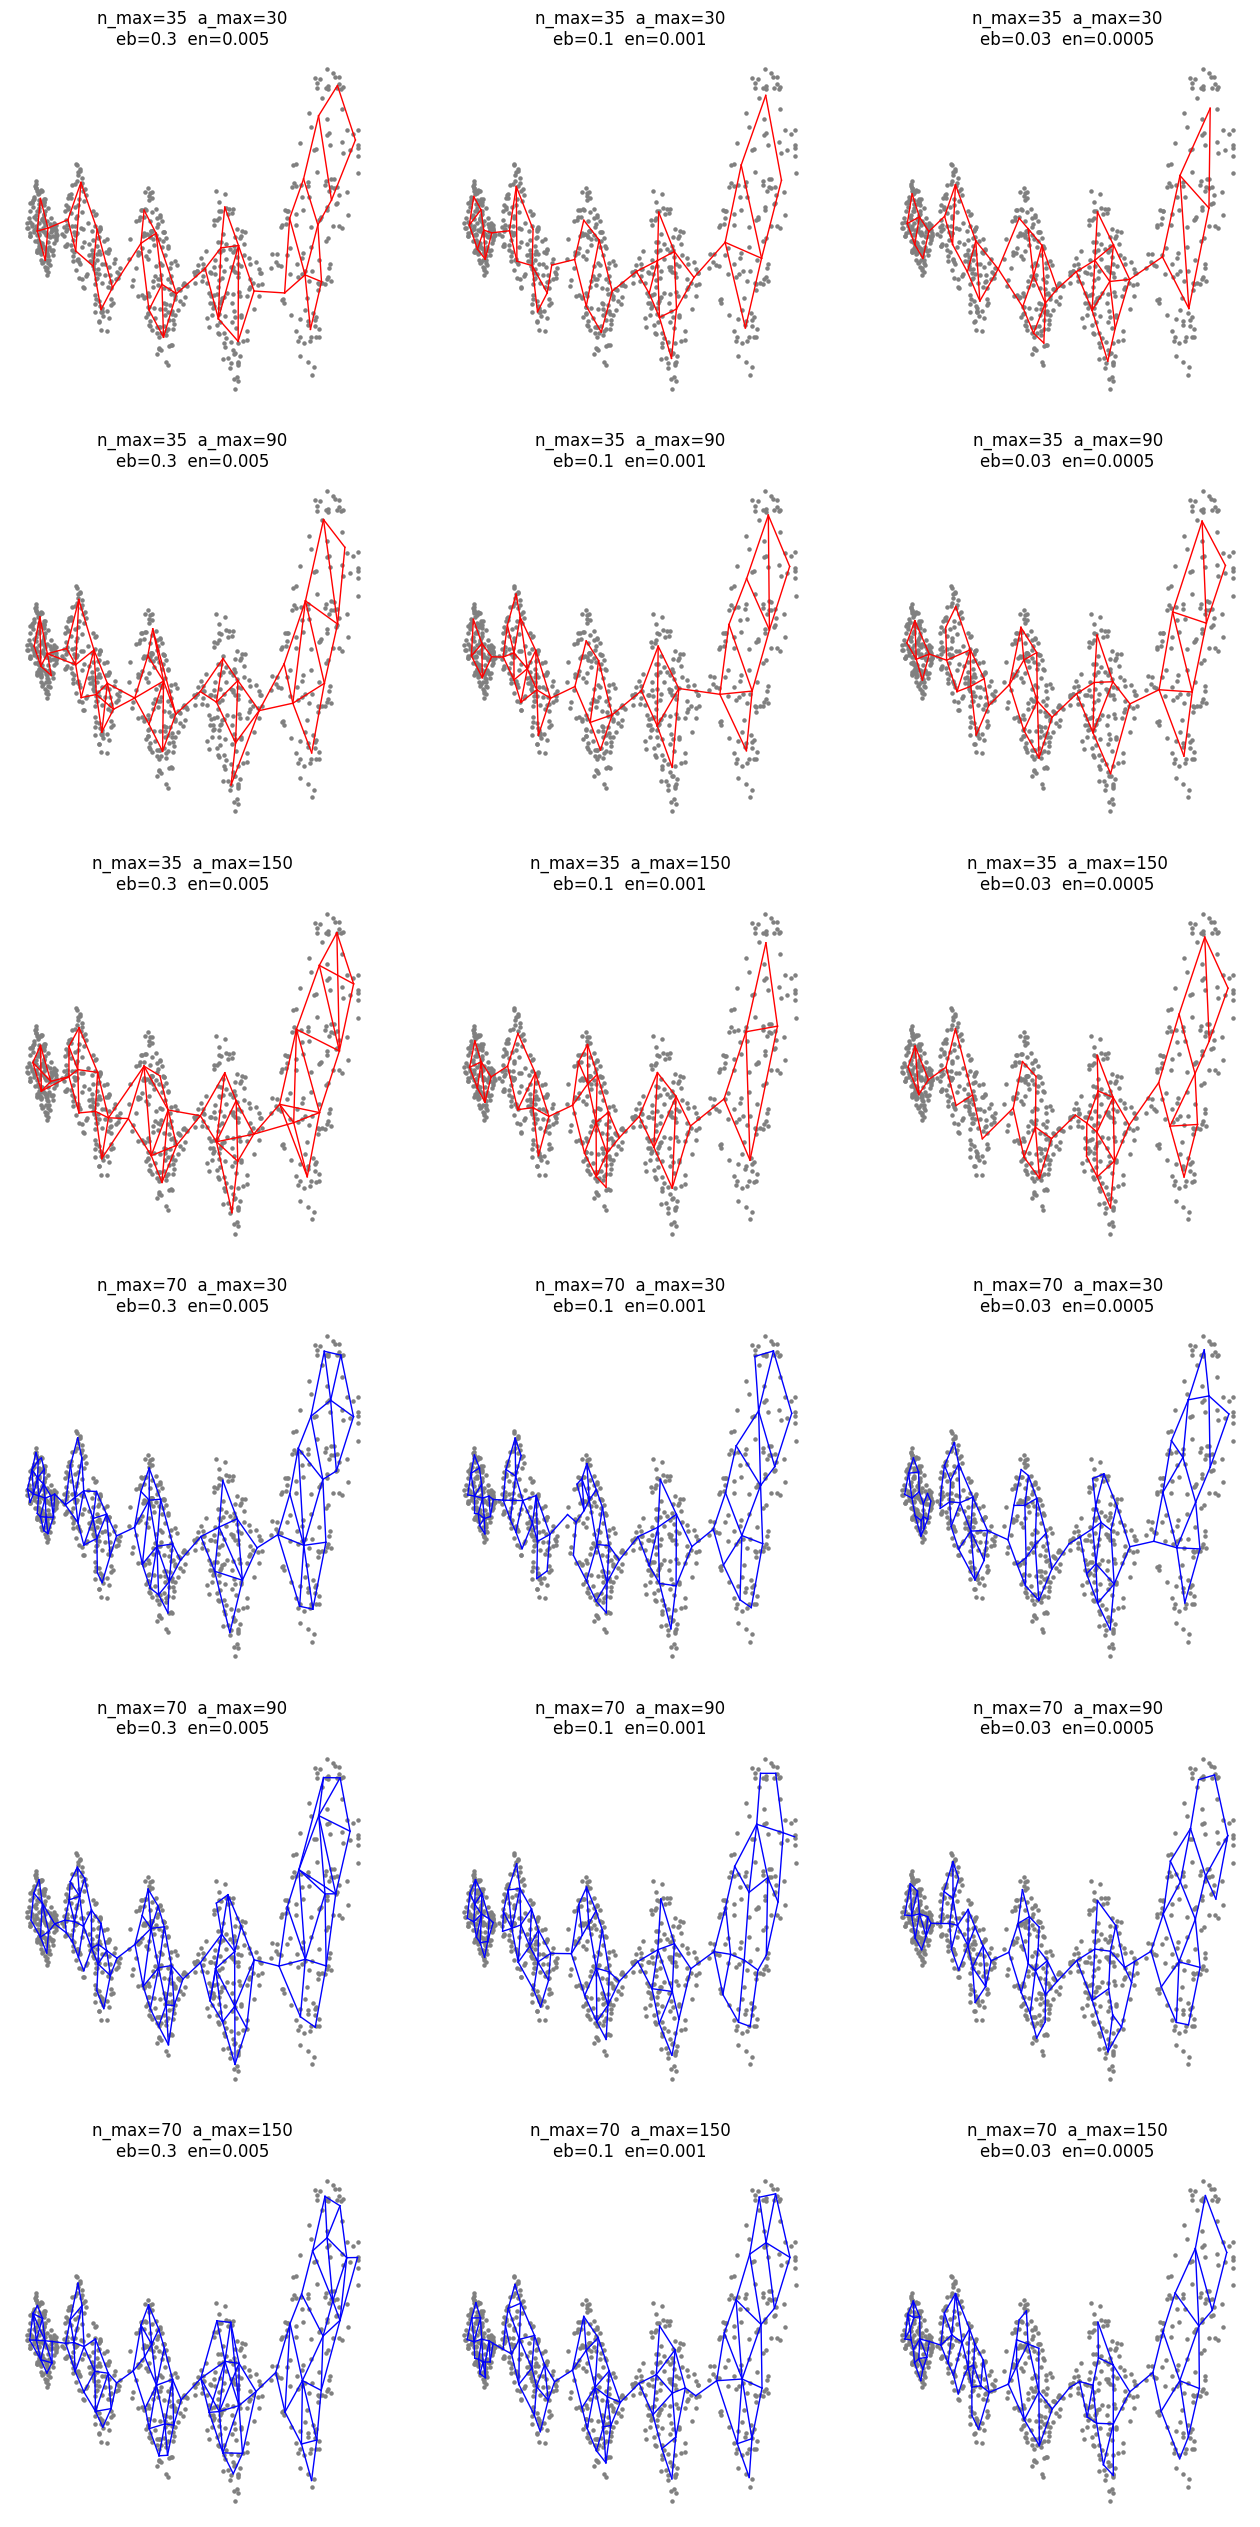

In [54]:
plt.figure(figsize=(16, 32))
for i, graph in zip(range(1, len(graphs) + 1), graphs):
    plt.subplot(6, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', s=5)
    for edge in graph.es:
        v1 = graph.vs[edge.source]
        v2 = graph.vs[edge.target]
        color = 'r' if i <= len(graphs)/2 else 'b'
        plt.plot([v1['weight'][0], v2['weight'][0]], [v1['weight'][1], v2['weight'][1]], c=color, linewidth=1.0)
    plt.axis('off')

i = 1  
for max_neurons in l_max_neurons:
    for max_age in l_max_ages:
        for eb, en in zip(l_eb, l_en):
            plt.subplot(6, 3, i)
            plt.title(f"n_max={max_neurons}  a_max={max_age}\neb={eb}  en={en}")
            i += 1

plt.show()